# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

<span style="color:blue">- Buscaremos um jeito de prever a renda de uma pessoa baseando-se em informações de um banco de dados.</span>


## Etapa 2 Crisp-DM: Entendimento dos dados
<span style="color:blue">Dados que serão a base do modelo de previsão.</span>


### Dicionário de dados

<span style="color:red"></span>


| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |   Datas de referência de registro                                      | Inteiro|
| id_cliente              |  Identificação do cliente                                     | Objeto|
| sexo                    |  F = Feminino / M = Masculino                                     | Objeto|
| posse_de_veiculo        |  Y = Possui / N = Não Possui                                      | Objeto|
| posse_de_imovel         |  Y = Possui / N = Não Possui                                     | Objeto|
| qtd_filhos              |  Quantidade de filhos                                 | Inteiro|
| tipo_renda              |  Tipo de emprego                                      | Objeto|
| educacao                |  Nível de educação que possui                                      | Objeto|
| estado_civil            |  Estado Civil                                     | Objeto|
| tipo_residencia         |  Tipo de imóvel                                     | Objeto|
| idade                   |  Idade                                    | Float|
| tempo_emprego           |  Tempo empregado                                     | Float|
| qt_pessoas_residencia   |  Quantas pessoas moram na residência                                     | Float|
| renda                   |  Renda bruta mensal                                      | Float|





#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [79]:
import graphviz
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas_profiling 

from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [80]:
renda = pd.read_csv('previsao_de_renda.csv')

In [81]:
renda.head(1)

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.60274,1.0,8060.34


In [82]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [83]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [84]:
prof.to_file('./output/renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]


- 67,5% dos clientes da base de dados são do sexo Feminino.
- 60,9% não possuem veículo.
- 67,6% possuem imóvel.
- 69,2% não possuem filhos.

### Entendimento dos dados - Bivariadas




<span style="color:Blue">Vamos criar alguns gráficos utilizando a variável renda no eixo y, buscando alguma correlação entre as variáveis explicativas e a variável renda.
</span>


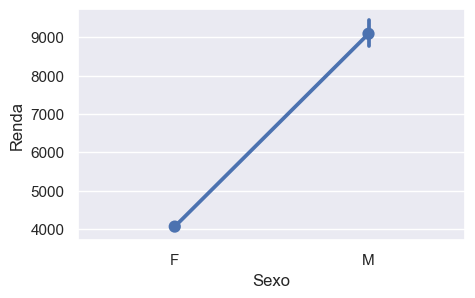

In [45]:
sns.set_theme(style="darkgrid")
plt.rc('figure', figsize=(5,3))
ax = sns.pointplot(x="sexo", y="renda",
                   data=renda, dodge=True, ci = 95).set(xlabel='Sexo',ylabel='Renda')      

- Homens ganham mais que mulheres.


[Text(0.5, 0, 'Posse de Imóvel'), Text(0, 0.5, 'Renda')]

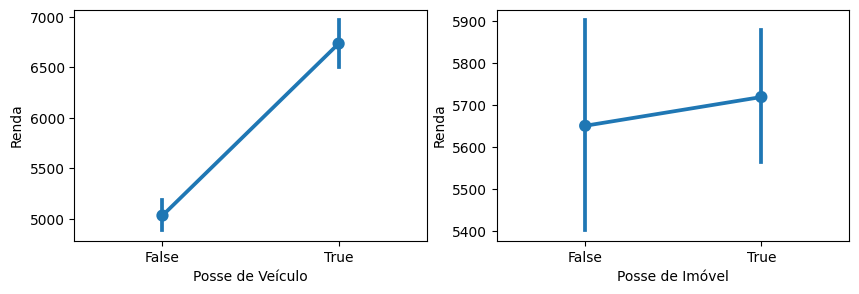

In [44]:
plt.rc('figure', figsize=(10, 3))
fig, axes = plt.subplots(1,2)

sns.pointplot(ax = axes[0], x="posse_de_veiculo", y="renda",
                   data=renda, dodge=True, ci = 95).set(xlabel='Posse de Veículo',ylabel='Renda')

sns.pointplot(ax = axes[1], x="posse_de_imovel", y="renda",
                   data=renda, dodge=True, ci = 95).set(xlabel='Posse de Imóvel',ylabel='Renda')

<b> - O indíce de clientes que possuem veículo aumenta conforme a renda.
    
<b> - Já o indíce de imóvel não sofre tanta alteração.
   

[Text(0.5, 0, 'Idade'), Text(0, 0.5, 'Renda')]

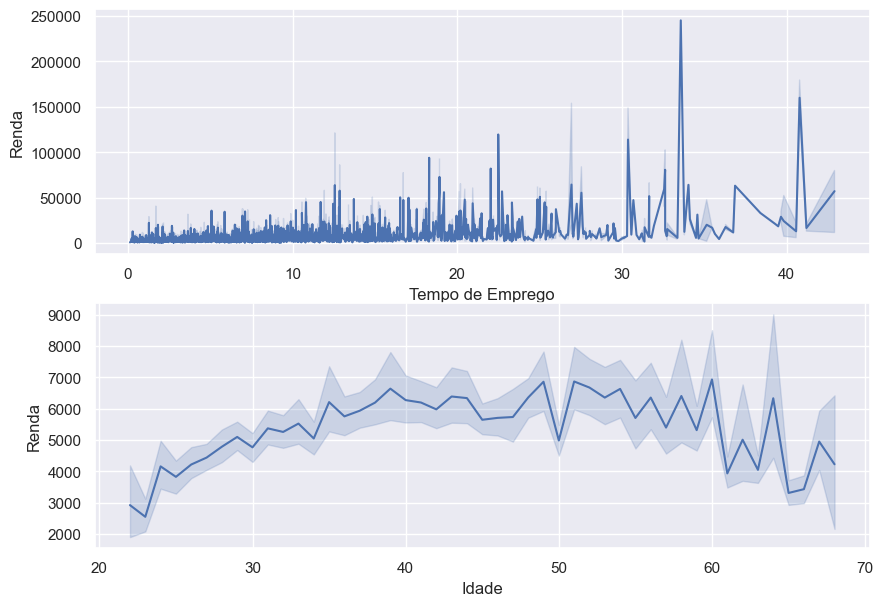

In [47]:
plt.rc('figure', figsize=(10, 7))
fig, axes = plt.subplots(2,1)

sns.lineplot(ax = axes[0], x="tempo_emprego", y="renda",
                   data=renda, ci = 95).set(xlabel='Tempo de Emprego',ylabel='Renda')

sns.lineplot(ax = axes[1], x="idade", y="renda",
                   data=renda, ci = 95).set(xlabel='Idade',ylabel='Renda')

[Text(0.5, 0, 'Tipo de Residência'), Text(0, 0.5, 'Renda')]

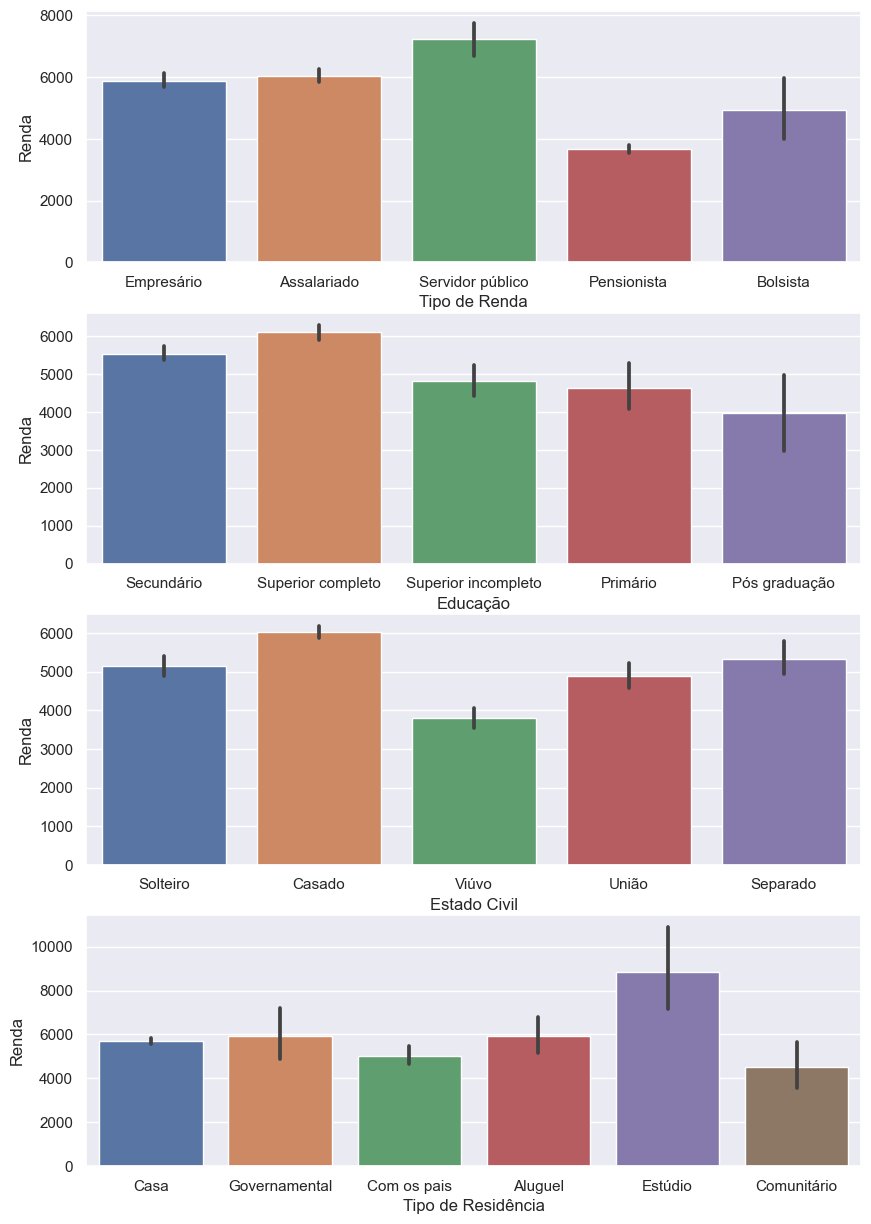

In [49]:
plt.rc('figure', figsize=(10, 15))
fig, axes = plt.subplots(4,1)

sns.barplot(ax = axes[0], x="tipo_renda", y="renda",
                   data=renda, ci = 95).set(xlabel='Tipo de Renda',ylabel='Renda')

sns.barplot(ax = axes[1], x="educacao", y="renda",
                   data=renda, ci = 95).set(xlabel='Educação',ylabel='Renda')

sns.barplot(ax = axes[2], x="estado_civil", y="renda",
                   data=renda, ci = 95).set(xlabel='Estado Civil',ylabel='Renda')

sns.barplot(ax = axes[3], x="tipo_residencia", y="renda",
                   data=renda, ci = 95).set(xlabel='Tipo de Residência',ylabel='Renda')

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



<span style="color:blue"> Selecionamos as variáveis que não se mostraram importantes na previsão.</span>


In [50]:
renda.drop(columns=['Unnamed: 0', 'data_ref'], inplace=True)
renda.head(1)

,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.60274,1.0,8060.34


In [52]:
renda.fillna(0, inplace = True)
renda['id_cliente'].duplicated().value_counts()
renda.drop_duplicates(subset = 'id_cliente', keep = 'first', inplace = True)

In [53]:
renda.drop(columns=['id_cliente'], inplace=True)
renda.head(1)

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.60274,1.0,8060.34


In [55]:
renda.duplicated().value_counts()

False    9845
dtype: int64

- Criando dummies

In [56]:
renda_dummies = pd.get_dummies(renda, columns=['sexo', 'posse_de_veiculo', 
                                               'posse_de_imovel', 'tipo_renda', 
                                               'educacao', 'estado_civil', 'tipo_residencia'], drop_first=True)
renda_dummies.head(1)

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,sexo_M,posse_de_veiculo_True,posse_de_imovel_True,tipo_renda_Bolsista,tipo_renda_Empresário,...,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,0,26,6.60274,1.0,8060.34,0,0,1,0,1,...,0,0,1,0,0,1,0,0,0,0


In [57]:
renda_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9845 entries, 0 to 14999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   qtd_filhos                     9845 non-null   int64  
 1   idade                          9845 non-null   int64  
 2   tempo_emprego                  9845 non-null   float64
 3   qt_pessoas_residencia          9845 non-null   float64
 4   renda                          9845 non-null   float64
 5   sexo_M                         9845 non-null   uint8  
 6   posse_de_veiculo_True          9845 non-null   uint8  
 7   posse_de_imovel_True           9845 non-null   uint8  
 8   tipo_renda_Bolsista            9845 non-null   uint8  
 9   tipo_renda_Empresário          9845 non-null   uint8  
 10  tipo_renda_Pensionista         9845 non-null   uint8  
 11  tipo_renda_Servidor público    9845 non-null   uint8  
 12  educacao_Pós graduação         9845 non-null   

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


<span style="color:blue"> Vamos trabalhar com a regressao LASSO.</span>

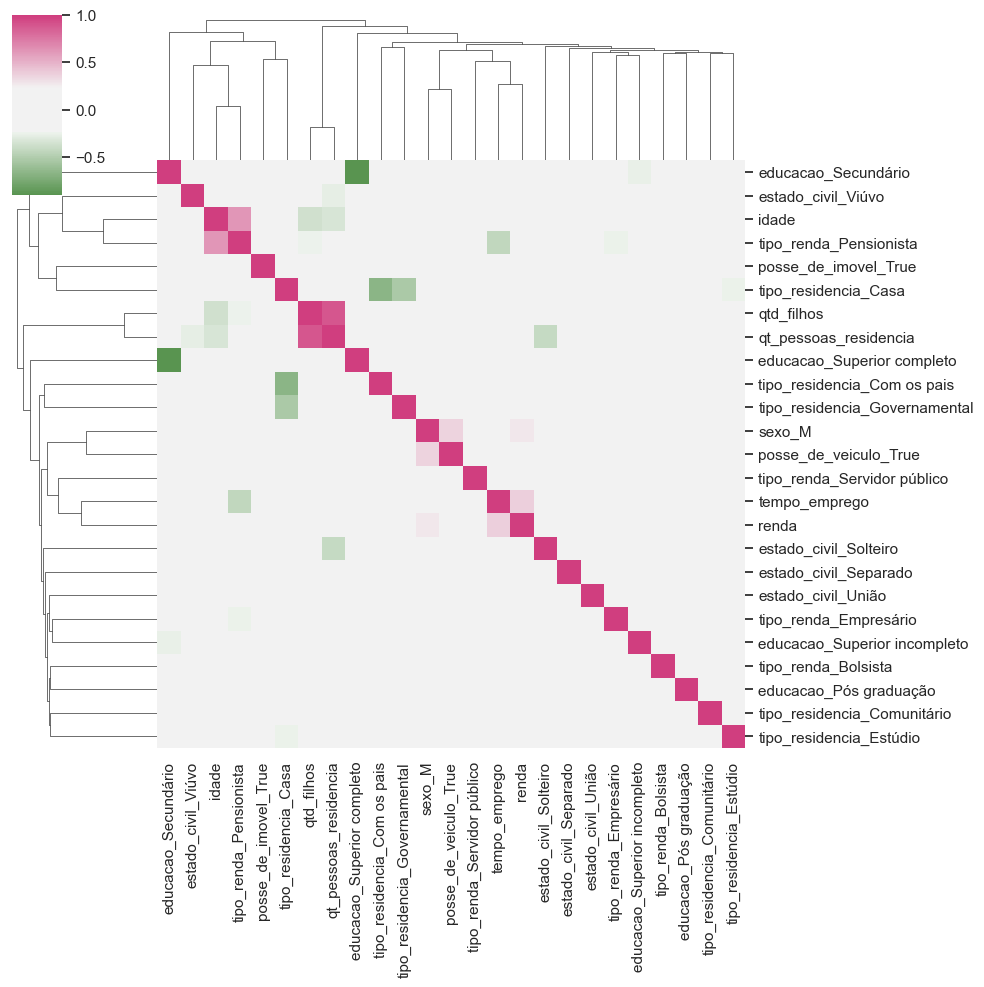

In [58]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')

sns.clustermap(renda_dummies.corr(), figsize=(10, 10), center = 0, cmap=cmap)

In [61]:
X_train_base, X_test_base = train_test_split(renda, train_size=0.8, random_state=100)

### Rodando o modelo


In [62]:
print(renda['tipo_renda'].value_counts())
print(renda['educacao'].value_counts())
print(renda['estado_civil'].value_counts())
print(renda['tipo_residencia'].value_counts())

Assalariado         5054
Empresário          2259
Pensionista         1689
Servidor público     836
Bolsista               7
Name: tipo_renda, dtype: int64
Secundário             6028
Superior completo      3315
Superior incompleto     381
Primário                107
Pós graduação            14
Name: educacao, dtype: int64
Casado      6866
Solteiro    1181
União        744
Separado     608
Viúvo        446
Name: estado_civil, dtype: int64
Casa             8882
Com os pais       444
Governamental     284
Aluguel           128
Estúdio            64
Comunitário        43
Name: tipo_residencia, dtype: int64


In [63]:
X = patsy.dmatrices('''renda ~ C(sexo) 
                    + C(posse_de_veiculo) 
                    + C(posse_de_imovel)
                    + qtd_filhos 
                    + C(tipo_renda) 
                    + C(educacao, Treatment(2)) 
                    + C(estado_civil) 
                    + C(tipo_residencia, Treatment(1)) 
                    + idade
                    + tempo_emprego
                    + qt_pessoas_residencia 
                    + 1''', X_train_base)

In [64]:
modelo = smf.ols(X, data = X_train_base).fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.8
                         , alpha = 0.1)
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     117.3
Date:                Thu, 07 Jul 2022   Prob (F-statistic):               0.00
Time:                        18:00:16   Log-Likelihood:                -81249.
No. Observations:                7876   AIC:                         1.625e+05
Df Residuals:                    7853   BIC:                         1.627e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                         -5634.4519   2813.849     -2.002      0.045   -1.12e+04    -118.559
C(sexo)[T.M]                                       6024.9132    195.060     30.887      0.000    5642.543    6407.283
C(posse_de_veiculo)[T.True]                          20.3172    184.944      0.110      0.913    -342.222     382.857
C(posse_de_imovel)[T.True]                          231.4645    181.808      1.273      0.203    -124.927     587.856
C(tipo_renda)[T.Bolsista]                         -1278.8164   3282.637     -0.390      0.697   -7713.659    5156.026
C(tipo_renda)[T.Empresário]                         959.8908    210.604      4.558      0.000     547.050    1372.731
C(tipo_renda)[T.Pensionista]                       2751.3821    337.277      8.158      0.000    2090.229    3412.535
C(tipo_renda)[T.Servidor público]                   106.2286    311.318      0.341      0.733    -504.038     716.496
C(educacao, Treatment(2))[T.Primário]              -275.6413    778.241     -0.354      0.723   -1801.201    1249.919
C(educacao, Treatment(2))[T.Pós graduação]                 0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Superior completo]      721.0205    182.112      3.959      0.000     364.032    1078.009
C(educacao, Treatment(2))[T.Superior incompleto]   -297.9025    441.927     -0.674      0.500   -1164.197     568.392
C(estado_civil)[T.Separado]                        1226.6313   1428.001      0.859      0.390   -1572.630    4025.892
C(estado_civil)[T.Solteiro]                         983.9963   1400.796      0.702      0.482   -1761.937    3729.930
C(estado_civil)[T.União]                           -331.6887    316.745     -1.047      0.295    -952.594     289.217
C(estado_civil)[T.Viúvo]                           1101.7417   1447.366      0.761      0.447   -1735.480    3938.963
C(tipo_residencia, Treatment(1))[T.Aluguel]         731.3053    748.870      0.977      0.329    -736.679    2199.290
C(tipo_residencia, Treatment(1))[T.Com os pais]      -1.2966    405.959     -0.003      0.997    -797.084     794.491
C(tipo_residencia, Treatment(1))[T.Comunitário]    -256.7598   1197.699     -0.214      0.830   -2604.569    2091.049
C(tipo_residencia, Treatment(1))[T.Estúdio]                0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Governamental]   797.5744    498.213      1.601      0.109    -179.057    1774.205
qtd_filhos                                        -1236.2494   1388.292     -0.890      0.373   -3957.670    1485.172
idade                                                46.5222     10.774      4.318      0.000      25.403      67.642
tempo_emprego  

In [65]:
X_test_base['pred_renda'] = modelo.predict(X_test_base)
r = X_test_base[['pred_renda', 'renda']].corr().iloc[0,1]
r**2

0.2402232296444078

- Alternado a variável reposta do log.

In [66]:
X = patsy.dmatrices('''np.log(renda) ~ C(sexo) 
                    + C(posse_de_veiculo) 
                    + C(posse_de_imovel)
                    + qtd_filhos 
                    + C(tipo_renda) 
                    + C(educacao, Treatment(2)) 
                    + C(estado_civil) 
                    + C(tipo_residencia, Treatment(1)) 
                    + idade/
                    + tempo_emprego
                    + qt_pessoas_residencia 
                    + 1''', X_train_base)

In [67]:
modelo = smf.ols(X, data = X_train_base).fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.8
                         , alpha = 0.1)
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     525.7
Date:                Thu, 07 Jul 2022   Prob (F-statistic):               0.00
Time:                        18:04:21   Log-Likelihood:                -8722.4
No. Observations:                7876   AIC:                         1.746e+04
Df Residuals:                    7869   BIC:                         1.752e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             7.3869      0.041    180.687      0.000       7.307       7.467
C(sexo)[T.M]                                          0.7735      0.019     40.169      0.000       0.736       0.811
C(posse_de_veiculo)[T.True]                           0.0382      0.018      2.090      0.037       0.002       0.074
C(posse_de_imovel)[T.True]                            0.0912      0.018      5.117      0.000       0.056       0.126
C(tipo_renda)[T.Bolsista]                                  0          0        nan        nan           0           0
C(tipo_renda)[T.Empresário]                                0          0        nan        nan           0           0
C(tipo_renda)[T.Pensionista]                               0          0        nan        nan           0           0
C(tipo_renda)[T.Servidor público]                          0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Primário]                      0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Pós graduação]                 0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Superior completo]             0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Superior incompleto]           0          0        nan        nan           0           0
C(estado_civil)[T.Separado]                                0          0        nan        nan           0           0
C(estado_civil)[T.Solteiro]                                0          0        nan        nan           0           0
C(estado_civil)[T.União]                                   0          0        nan        nan           0           0
C(estado_civil)[T.Viúvo]                                   0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Aluguel]                0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Com os pais]            0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Comunitário]            0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Estúdio]                0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Governamental]          0          0        nan        nan           0           0
qtd_filhos                                            0.0220      0.012      1.890      0.059      -0.001       0.045
idade                                                 0.0043      0.001      5.287      0.000       0.003       0.006
idade:tempo_emp

In [68]:
X_test_base['log_renda'] = np.log(X_test_base['renda'])
X_test_base['pred_renda'] = modelo.predict(X_test_base)
r = X_test_base[['pred_renda', 'log_renda']].corr().iloc[0,1]
r**2

0.32336821536704724

- o R² utilizando o log é maior do que utilizando só renda.

<span style="color:red">Diminuindo o overfitting</span>


In [69]:
X_renda = renda_dummies.drop(columns = ['renda']).copy()
y_renda = np.log(renda_dummies['renda'])

In [70]:
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X_renda, y_renda, train_size=0.8, random_state=100)

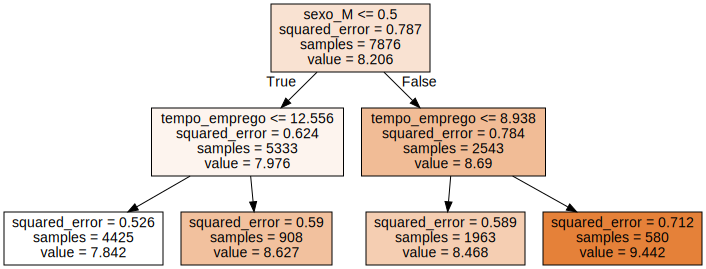

In [71]:
reg_tree = DecisionTreeRegressor(max_depth=2, min_samples_leaf=10)

reg_tree.fit(X_train_tree, y_train_tree)

dot_data = tree.export_graphviz(reg_tree, out_file=None, 
                                feature_names=X_renda.columns,
                                filled=True)

graph = graphviz.Source(dot_data, format="png") 
graph

In [72]:
X = patsy.dmatrices('''np.log(renda) ~ C(sexo)
                    + C(posse_de_veiculo)
                    + C(posse_de_imovel)
                    + qtd_filhos 
                    + idade
                    + tempo_emprego
                    + 1''', X_train_base)

modelo = smf.ols(X, data = X_train_base).fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.8
                         , alpha = 0.1)
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     651.4
Date:                Thu, 07 Jul 2022   Prob (F-statistic):               0.00
Time:                        18:10:31   Log-Likelihood:                -8645.5
No. Observations:                7876   AIC:                         1.730e+04
Df Residuals:                    7870   BIC:                         1.735e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       7.1387      0.039    185.046      0.000       7.063       7.214
C(sexo)[T.M]                    0.7839      0.019     41.133      0.000       0.747       0.821
C(posse_de_veiculo)[T.True]     0.0375      0.018      2.078      0.038       0.002       0.073
C(posse_de_imovel)[T.True]      0.0938      0.018      5.317      0.000       0.059       0.128
qtd_filhos                           0          0        nan        nan           0           0
idade                           0.0087      0.001     11.465      0.000       0.007       0.010
tempo_emprego                   0.0557      0.001     46.116      0.000       0.053       0.058
==============================================================================
Omnibus:                        1.952   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.377   Jarque-Bera (JB):                1.971
Skew:                          -0.007   Prob(JB):                        0.373
Kurtosis:                       3.076   Cond. No.                         236.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
X_train_all, X_test_all = train_test_split(renda_dummies, train_size=0.8, random_state=100)

modelo = smf.ols('''np.log(renda) ~ sexo_M
                    + posse_de_veiculo_True
                    + posse_de_imovel_True
                    + idade
                    + tempo_emprego''', data = X_train_all).fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.8
                         , alpha = 0.1)
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     651.4
Date:                Thu, 07 Jul 2022   Prob (F-statistic):               0.00
Time:                        18:10:50   Log-Likelihood:                -8645.5
No. Observations:                7876   AIC:                         1.730e+04
Df Residuals:                    7870   BIC:                         1.735e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 7.1387      0.039    185.046      0.000       7.063       7.214
sexo_M                    0.7839      0.019     41.133      0.000       0.747       0.821
posse_de_veiculo_True     0.0375      0.018      2.078      0.038       0.002       0.073
posse_de_imovel_True      0.0938      0.018      5.317      0.000       0.059       0.128
idade                     0.0087      0.001     11.465      0.000       0.007       0.010
tempo_emprego             0.0557      0.001     46.116      0.000       0.053       0.058
==============================================================================
Omnibus:                        1.952   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.377   Jarque-Bera (JB):                1.971
Skew:                          -0.007   Prob(JB):                        0.373
Kurtosis:                       3.076   Cond. No.                         221.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
modelo = smf.ols('''np.log(renda) ~ sexo_M
                    + posse_de_imovel_True
                    + idade
                    + tempo_emprego''', data = X_train_all).fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.8
                         , alpha = 0.1)
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     780.5
Date:                Thu, 07 Jul 2022   Prob (F-statistic):               0.00
Time:                        18:11:06   Log-Likelihood:                -8647.6
No. Observations:                7876   AIC:                         1.731e+04
Df Residuals:                    7871   BIC:                         1.735e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                7.1556      0.038    189.709      0.000       7.082       7.230
sexo_M                   0.7970      0.018     44.299      0.000       0.762       0.832
posse_de_imovel_True     0.0944      0.018      5.352      0.000       0.060       0.129
idade                    0.0085      0.001     11.308      0.000       0.007       0.010
tempo_emprego            0.0557      0.001     46.129      0.000       0.053       0.058
==============================================================================
Omnibus:                        1.869   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.393   Jarque-Bera (JB):                1.882
Skew:                          -0.007   Prob(JB):                        0.390
Kurtosis:                       3.074   Cond. No.                         216.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
modelo = smf.ols('''np.log(renda) ~ sexo_M
                    + posse_de_imovel_True
                    + idade
                    + tempo_emprego''', data = X_train_all).fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.8
                         , alpha = 0.5)
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     965.0
Date:                Thu, 07 Jul 2022   Prob (F-statistic):               0.00
Time:                        18:11:22   Log-Likelihood:                -8661.9
No. Observations:                7876   AIC:                         1.733e+04
Df Residuals:                    7872   BIC:                         1.737e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                7.2003      0.037    195.407      0.000       7.128       7.273
sexo_M                   0.7948      0.018     44.113      0.000       0.760       0.830
posse_de_imovel_True          0          0        nan        nan           0           0
idade                    0.0090      0.001     12.009      0.000       0.008       0.010
tempo_emprego            0.0555      0.001     45.921      0.000       0.053       0.058
==============================================================================
Omnibus:                        1.756   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.416   Jarque-Bera (JB):                1.751
Skew:                          -0.013   Prob(JB):                        0.417
Kurtosis:                       3.069   Cond. No.                         216.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
modelo = smf.ols('''np.log(renda) ~ sexo_M
                    + idade
                    + I(idade**2)
                    + tempo_emprego
                    + I(tempo_emprego**2)''', data = X_train_all).fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.8
                         , alpha = 0.01)
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     647.7
Date:                Thu, 07 Jul 2022   Prob (F-statistic):               0.00
Time:                        18:11:48   Log-Likelihood:                -8653.0
No. Observations:                7876   AIC:                         1.732e+04
Df Residuals:                    7870   BIC:                         1.737e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 7.6038      0.135     56.306      0.000       7.339       7.869
sexo_M                    0.7933      0.018     44.047      0.000       0.758       0.829
idade                    -0.0130      0.007     -2.003      0.045      -0.026      -0.000
I(idade ** 2)             0.0003    7.3e-05      3.506      0.000       0.000       0.000
tempo_emprego             0.0666      0.003     20.072      0.000       0.060       0.073
I(tempo_emprego ** 2)    -0.0004      0.000     -3.254      0.001      -0.001      -0.000
==============================================================================
Omnibus:                        1.840   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.399   Jarque-Bera (JB):                1.847
Skew:                          -0.009   Prob(JB):                        0.397
Kurtosis:                       3.073   Cond. No.                     3.79e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
X_test_all['pred_renda'] = np.exp(modelo.predict(X_test_all))
r = X_test_all[['pred_renda', 'renda']].corr().iloc[0,1]
r

0.5854364750808226

In [78]:
r**2

0.34273586635505865

## Etapa 5 Crisp-DM: Avaliação dos resultados


<span style="color:blue">Conseguimos um modelo que prevê a variável renda que contempla 34,27% da variância.</span>


## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.